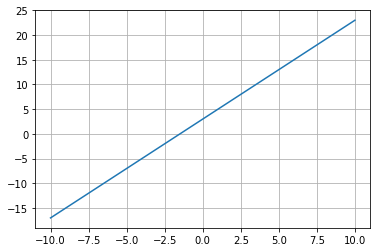

In [1]:
import matplotlib.pyplot as plt 
import math

def get_vx(fr, to, jump):
    v = []
    while fr < to:
        v.append(fr)
        fr += jump
    return v

vx = []
vy = []
vx = get_vx(-10,10,0.1)


for x in vx:
    vy.append(2*x+3)

plt.plot(vx, vy)
plt.grid()
plt.show()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/1000
0s - loss: 90260.6094
Epoch 2/1000
0s - loss: 86425.9688
Epoch 3/1000
0s - loss: 82804.4062
Epoch 4/1000
0s - loss: 79374.6719
Epoch 5/1000
0s - loss: 76119.0156
Epoch 6/1000
0s - loss: 73022.4297
Epoch 7/1000
0s - loss: 70072.1797
Epoch 8/1000
0s - loss: 67257.3750
Epoch 9/1000
0s - loss: 64568.5859
Epoch 10/1000
0s - loss: 61997.6133
Epoch 11/1000
0s - loss: 59537.2344
Epoch 12/1000
0s - loss: 57181.0469
Epoch 13/1000
0s - loss: 54923.3242
Epoch 14/1000
0s - loss: 52758.9062
Epoch 15/1000
0s - loss: 50683.0859
Epoch 16/1000
0s - loss: 48691.5781
Epoch 17/1000
0s - loss: 46780.4297
Epoch 18/1000
0s - loss: 44945.9609
Epoch 19/1000
0s - loss: 43184.76

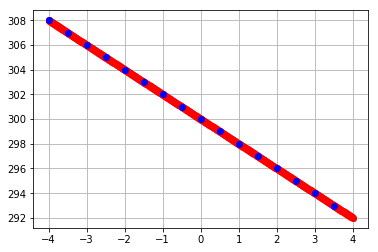

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf

vx = []
vy = []
vx = get_vx(-4,4,0.5)
for x in vx:
    vy.append(-2*x+300)


x_data = [[x] for x in vx]
y_data = [[y] for y in vy]

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()
model.fit(x_data, y_data, epochs=1000, verbose=2)



vx2 = get_vx(-4,4,0.01)
x_data2 = [[x] for x in vx2]
vy2 = model.predict(x_data2)
plt.plot(vx2, vy2, 'ro')
plt.plot(vx, vy, 'bo')
plt.grid()
plt.show()

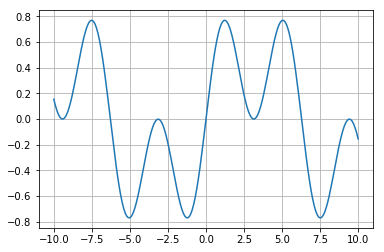

In [3]:
import matplotlib.pyplot as plt 
import math

def get_vx(fr, to, jump):
    v = []
    while fr < to:
        v.append(fr)
        fr += jump
    return v

vx = []
vy = []
vx = get_vx(-10,10,0.1)


for x in vx:
    vy.append(math.sin(x)*math.cos(x/2))

plt.plot(vx, vy)
plt.grid()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 400)               800       
_________________________________________________________________
dense_24 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 401       
Total params: 161,601.0
Trainable params: 161,601
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/10000
0s - loss: 3.0323
Epoch 2/10000
0s - loss: 1.2787
Epoch 3/10000
0s - loss: 0.8134
Epoch 4/10000
0s - loss: 0.5274
Epoch 5/10000
0s - loss: 0.3160
Epoch 6/10000
0s - loss: 0.3508
Epoch 7/10000
0s - loss: 0.2590
Epoch 8/10000
0s - loss: 0.2563
Epoch 9/10000
0s - loss: 0.2644
Epoch 10/10000
0s - loss: 0.2404
Epoch 11/10000
0s - loss: 0.2595
Epoch 12/10000
0s - loss: 0.2475
Epoch 13/

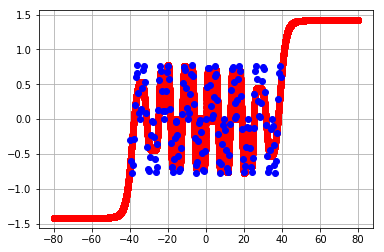

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf

vx = []
vy = []
vx = get_vx(-40,40,0.5)
for x in vx:
    # vy.append(math.sin(x)*math.cos(x/2))
    vy.append(math.sin(x) * math.cos(x/2.0) + 0)


x_data = [[x] for x in vx]
y_data = [[y] for y in vy]

model = Sequential()
model.add(Dense(400, input_dim=1, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(400, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(x_data, y_data, epochs=10000, verbose=2)



vx2 = get_vx(-80,80,0.01)
x_data2 = [[x] for x in vx2]
vy2 = model.predict(x_data2)
plt.plot(vx2, vy2, 'ro')
plt.plot(vx, vy, 'bo')
plt.grid()
plt.show()

In [147]:
print 'min x:', vx2[vy2.argmin()]

min x: -1.23


In [ ]:

def get_local_maxima(in_tensor):
  max_pooled_in_tensor = tf.nn.pool(in_tensor, window_shape=(3, 3), pooling_type='MAX', padding='SAME')
  maxima = tf.where(tf.equal(in_tensor, max_pooled_in_tensor), in_tensor, tf.zeros_like(in_tensor))
  return maxima


def cost(x):
    y = math.sin(x) * math.cos(x/2.0)
    fx = model.predict([x])
    return (y - fx) ** 2

# 최적화 대상 변수: x

import tensorflow as tf
import matplotlib.pyplot as plt
tf.reset_default_graph()

X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
W = tf.Variable(5.0, name='weight')

hypothesis = math.sin(x) * math.cos(x/2.0)
cost = Y

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train, feed_dict={X:x_data, Y:y_data})

show_graph(tf.get_default_graph().as_graph_def())

In [135]:
import tensorflow as tf

x = tf.Variable(2, name='x', dtype=tf.float32)
log_x = tf.log(x)
log_x_squared = tf.square(log_x)

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(log_x_squared)

init = tf.global_variables_initializer()

def optimize():
  with tf.Session() as session:
    session.run(init)
    print("starting at", "x:", session.run(x), "log(x)^2:", session.run(log_x_squared))
    for step in range(10):  
      session.run(train)
      print("step", step, "x:", session.run(x), "log(x)^2:", session.run(log_x_squared))
        

optimize()

('starting at', 'x:', 2.0, 'log(x)^2:', 0.48045301)
('step', 0, 'x:', 1.6534264, 'log(x)^2:', 0.25285786)
('step', 1, 'x:', 1.3493005, 'log(x)^2:', 0.089751966)
('step', 2, 'x:', 1.1272696, 'log(x)^2:', 0.014351669)
('step', 3, 'x:', 1.0209966, 'log(x)^2:', 0.0004317743)
('step', 4, 'x:', 1.0006447, 'log(x)^2:', 4.1534943e-07)
('step', 5, 'x:', 1.0000006, 'log(x)^2:', 3.5527118e-13)
('step', 6, 'x:', 1.0, 'log(x)^2:', 0.0)
('step', 7, 'x:', 1.0, 'log(x)^2:', 0.0)
('step', 8, 'x:', 1.0, 'log(x)^2:', 0.0)
('step', 9, 'x:', 1.0, 'log(x)^2:', 0.0)
